In [1]:
import pandas as pd
import numpy as np
import requests
import time
import os
import csv
from io import StringIO
import urllib3
from datetime import datetime, timedelta
import sys
from datetime import date
import math
import statistics
from math import exp
from scipy.stats import tmean, tstd
import matplotlib.pyplot as plt

#### **Plot Percentage count By Return Perion of PMP**

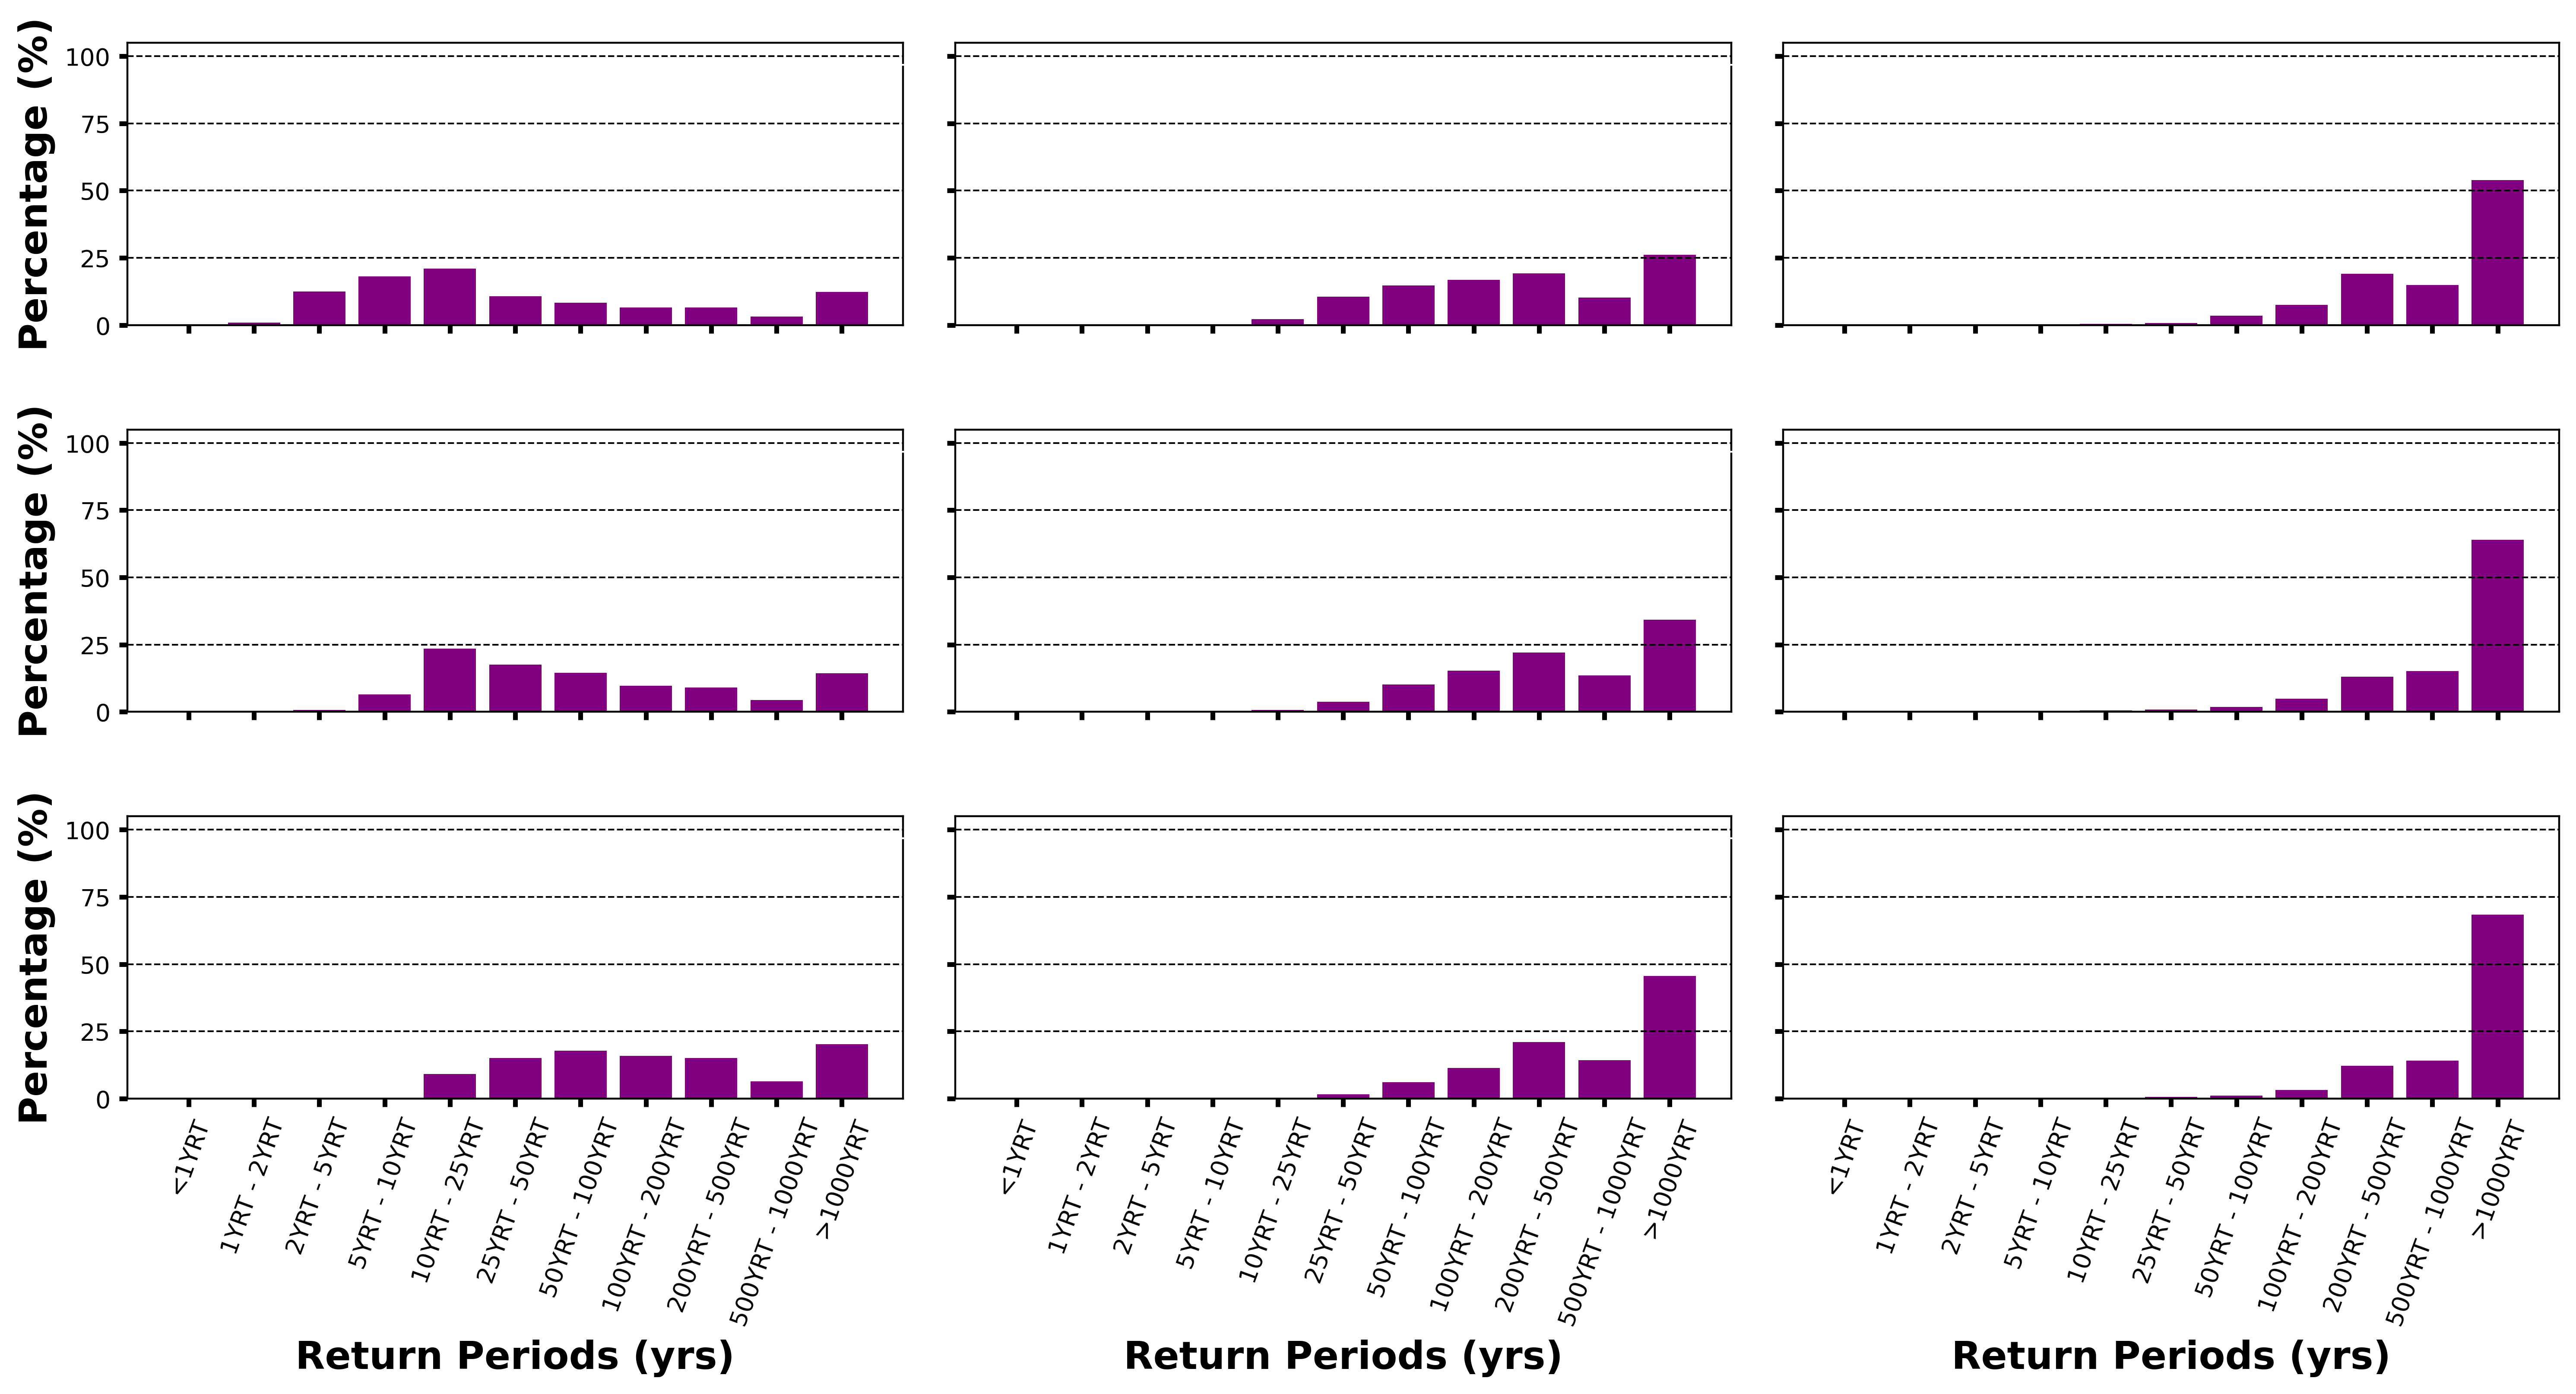

In [2]:
# Read in CSV
# df = pd.read_csv('./return_period_annual_max_pmp_stn.csv')     # pmp vs pfe (from stattion annual max pmp)  
# df = pd.read_csv('./return_period_annual_max_pmp.csv')     # pmp vs pfe (from imerg annual max pmp)  
# df = pd.read_csv('./return_period_alltime_max_pmp.csv')    # pmp vs pfe (from imerg alltime max pmp)  
# df = pd.read_csv('./return_period_alltime_partial_duration_max_pmp.csv')    # pmp vs pfe (from imerg alltime partial duration max pmp)  
df = pd.read_csv('./zzz6_return_period_curve_fitted_pmp.csv')    # pmp vs pfe (from imerg enhanved PMP curve fitted)  
      
# print(dfa)

# labels = ["<Y1", "Y1 - Y2", "Y2 - Y5", "Y5 - Y10", "Y10 - Y25", "Y25 - Y50", "Y50 - Y100", "Y100 - Y200", "Y200 - Y500", "Y500 - Y1000", ">Y1000"]
labels = ["<1YRT", "1YRT - 2YRT", "2YRT - 5YRT", "5YRT - 10YRT", "10YRT - 25YRT", "25YRT - 50YRT", 
          "50YRT - 100YRT", "100YRT - 200YRT", "200YRT - 500YRT", "500YRT - 1000YRT", ">1000YRT"]


## Pass dataset to array
xar1 = df.to_xarray()


SN = xar1['SN'];
RP = xar1['RP_range'];
F30m = xar1['freq_30_min']; P30m = xar1['percent_30_min'];
F1h = xar1['freq_1_hour'];   P1h = xar1['percent_1_hour'];
F2h = xar1['freq_2_hour'];   P2h = xar1['percent_2_hour'];
F3h = xar1['freq_3_hour'];   P3h = xar1['percent_3_hour'];
F6h = xar1['freq_6_hour'];   P6h = xar1['percent_6_hour'];
F12h = xar1['freq_12_hour']; P12h = xar1['percent_12_hour'];
F24h = xar1['freq_24_hour']; P24h = xar1['percent_24_hour'];
F2D = xar1['freq_48_hour'];   P2D = xar1['percent_48_hour'];
F3D = xar1['freq_72_hour'];   P3D = xar1['percent_72_hour'];

plt.figure(figsize=(15, 8), dpi=400)
# collor = 'brown'; # station annual max pmp
# collor = 'darkviolet'; # imerg annual max pmp
# collor = 'indigo';     # imerg all-time max pmp
# collor = 'darkgreen';     # imerg all-time partial duration max pmp
collor = 'purple';     # imerg enhanced pmp (curve fitted)
# darkviolet, darkgreen/darkblue, indigo, brown, (blue, darkblue, red, violet, darkviolet)
topp = 105  # HERSHFIELD (IMERG -> darkviolet)

# 30-min Assessment
plt.subplot(3,3,1) #projection='3d'
plt.ylim(top=topp)  # 1052
# plt.bar(SN, F30m, color=collor, label = "Frequency")
plt.bar(SN, P30m, color=collor, label = "Percentage")  #Percentage
# plt.xlabel('Return Periods (Yrs)', fontweight='bold', fontsize=8)
plt.ylabel('Percentage (%)', fontweight='bold', fontsize=16) # Percentage (%)
plt.xticks(SN, labels,  rotation=45, fontsize=6, color='w') 
plt.tick_params(axis='both', which='major', labelsize=10, width=2)
plt.grid(True, linestyle='--', linewidth='0.7', color='black', axis='y')

# 1-hr Assessment
plt.subplot(3,3,4) #projection='3d'
plt.ylim(top=topp)  # 1052
# plt.bar(SN, F1h, color=collor, label = "Frequency")
plt.bar(SN, P1h, color=collor, label = "Percentage")
# plt.xlabel('Return Periods (Yrs)', fontweight='bold', fontsize=8)
plt.ylabel('Percentage (%)', fontweight='bold', fontsize=16) # Percentage (%)
plt.xticks(SN, labels,  rotation=45, fontsize=6, color='w') 
plt.tick_params(axis='both', which='major', labelsize=10, width=2)
plt.grid(True, linestyle='--', linewidth='0.7', color='black', axis='y')

# 2-hr Assessment
plt.subplot(3,3,7) #projection='3d'
plt.ylim(top=topp)  # 1052
# plt.bar(SN, F2h, color=collor, label = "Frequency")
plt.bar(SN, P2h, color=collor, label = "Percentage")
plt.xlabel('Return Periods (yrs)', fontweight='bold', fontsize=16)
plt.ylabel('Percentage (%)', fontweight='bold', fontsize=16) # Percentage (%)
plt.xticks(SN, labels,  rotation=70, fontsize=6) 
plt.tick_params(axis='both', which='major', labelsize=10, width=2)
# plt.tick_params(axis='x', which='major', labelsize=8, width=2)
plt.grid(True, linestyle='--', linewidth='0.7', color='black', axis='y')

# 3-hr Assessment
plt.subplot(3,3,2) #projection='3d'
plt.ylim(top=topp)  # 1052
# plt.bar(SN, F3h, color=collor, label = "Frequency")
plt.bar(SN, P3h, color=collor, label = "Percentage")
plt.xticks(SN, labels,  rotation=45, fontsize=6, color='w') 
plt.yticks(color='w')
plt.tick_params(axis='both', which='major', labelsize=10, width=2)
plt.grid(True, linestyle='--', linewidth='0.7', color='black', axis='y')

# 6-hr Assessment
plt.subplot(3,3,5) #projection='3d'
plt.ylim(top=topp)  # 1052
# plt.bar(SN, F6h, color=collor, label = "Frequency")
plt.bar(SN, P6h, color=collor, label = "Percentage")
plt.xticks(SN, labels,  rotation=45, fontsize=6, color='w') 
plt.yticks(color='w')
plt.tick_params(axis='both', which='major', labelsize=10, width=2)
plt.grid(True, linestyle='--', linewidth='0.7', color='black', axis='y')

# 12-hr Assessment
plt.subplot(3,3,8) #projection='3d'
plt.ylim(top=topp)  # 1052
# plt.bar(SN, F12h, color=collor, label = "Frequency")
plt.bar(SN, P12h, color=collor, label = "Percentage")
plt.xlabel('Return Periods (yrs)', fontweight='bold', fontsize=16)
plt.xticks(SN, labels,  rotation=70, fontsize=6) 
plt.yticks(color='w')
plt.tick_params(axis='both', which='major', labelsize=10, width=2)
plt.grid(True, linestyle='--', linewidth='0.7', color='black', axis='y')

# 24-hr Assessment
plt.subplot(3,3,3) #projection='3d'
plt.ylim(top=topp)  # 1052
# plt.bar(SN, F24h, color=collor, label = "Frequency")
plt.bar(SN, P24h, color=collor, label = "Percentage")
plt.xticks(SN, labels,  rotation=45, fontsize=6, color='w')
plt.yticks(color='w')
plt.tick_params(axis='both', which='major', labelsize=10, width=2)
plt.grid(True, linestyle='--', linewidth='0.7', color='black', axis='y')

# 2-day Assessment
plt.subplot(3,3,6) #projection='3d'
plt.ylim(top=topp)  # 1052
# plt.bar(SN, F2D, color=collor, label = "Frequency")
plt.bar(SN, P2D, color=collor, label = "Percentage")
plt.xticks(SN, labels,  rotation=45, fontsize=6, color='w') 
plt.yticks(color='w')
plt.tick_params(axis='both', which='major', labelsize=10, width=2)
plt.grid(True, linestyle='--', linewidth='0.7', color='black', axis='y')

# 3-day Assessment
plt.subplot(3,3,9) #projection='3d'
plt.ylim(top=topp)  # 1052, 47
# plt.bar(SN, F3D, color=collor, label = "Frequency")
plt.bar(SN, P3D, color=collor, label = "Percentage")
plt.xlabel('Return Periods (yrs)', fontweight='bold', fontsize=16)
plt.xticks(SN, labels,  rotation=70, fontsize=6)  # weight = 'bold'
plt.yticks(color='w') 
plt.tick_params(axis='both', which='major', labelsize=10, width=2)
plt.grid(True, linestyle='--', linewidth='0.7', color='black', axis='y')


plt.subplots_adjust(hspace=0.1, wspace=0.05)
plt.tight_layout(pad=1, w_pad=-0.5, h_pad=-3.5)

# plt.tight_layout()
# plt.savefig("figs/1_pmp_pfe_stn_annual_max.png") 
# plt.savefig("figs/2_pmp_pfe_imerg_annual_max.png") 
# plt.savefig("figs/3_pmp_pfe_imerg_alltime_max.png") 
# plt.savefig("figs/4_pmp_pfe_imerg_partial_duration_max.png") 
plt.savefig("figs/5_pmp_pfe_enhanced_curve_fit.png") 
plt.show()